In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_excel("used_cars.xlsx") #Reading excel file
df.head()

,Unnamed: 0,Car_Name,Fuel_type,Running_in_kms,Engine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,height,width,length,Weight,Insp_score,top_speed,City_url,Car_price
0,0,2014 Maruti Wagon R,Petrol,"1,31,125 kms",998,Manual,21.79 kmpl,5,Grey,67.05,Disc,Drum,341 Litres,1675,1620,3655,1340,-,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,2.94 Lakh
1,1,2015 Hyundai Grand i10,Petrol,"73,875 kms",1197,Manual,18.9 kmpl,5,White,82,Disc,Drum,256-liters,1520,1660,3765,-,8,165 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,4.8 Lakh
2,2,2018 Volkswagen Vento,Diesel,"97,922 kms",1498,Manual,22.27 kmpl,5,White,108.6,Ventilated Disc,Drum,494,1467,1699,4390,1750,-,180 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,7.11 Lakh
3,3,2019 Maruti S-Presso,Petrol,"24,230 kms",998,Manual,21.7 kmpl,5,Red,67.05,Ventilated Disc,Drum,270,1564,1520,3565,1170,9.5,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,4.22 Lakh
4,4,2017 Maruti Wagon R,Petrol,"41,174 kms",998,Automatic,20.51 kmpl,5,Grey,67,Ventilated Disc,Drum,180-liters,1700,1495,3599,1350,9,152 kmph,https://www.cardekho.com/used-cars+in+ahmedabad,4.3 Lakh


Since i have to predict the used car price and the Car_Price column is a continuous data so it's a **Regression problem**.

Since Unnamed: 0 is an index column so let's drop it here itself.

In [4]:
#Droping unnecessary column
df = df.drop(["Unnamed: 0"],axis=1)

# Features Information:

- Car_Name : Name of the car with Year
- Fuel_type : Type of fuel used for car engine
- Running_in_kms : Car running in kms till the date
- Endine_disp : Engine displacement/engine CC
- Gear_transmission : Type of gear transmission used in car
- Milage_in_km/ltr : Overall milage of car in Km/ltr
- Seating_cap : Availability of number of seats in the car
- color : Car color
- Max_power : Maximum power of engine used in car in bhp
- front_brake_type : type of brake system used for front-side wheels
- rear_brake_type : type of brake system used for back-side wheels
- cargo_volume : the total cubic feet of space in a car's cargo area.
- height : Total height of car in mm
- width : Width of car in mm
- length : TOtal length of the car in mm
- Weight : Gross weight of the car in kg
- Insp_score : inspection rating out of 10
- top_speed : Maximum speed limit of the car in km per hours
- City_url : Url of the page of cars from a particular city
- Car_price : Price of the car

In [5]:
#Checking shape of the dataset
df.shape

(12607, 20)

In [6]:
#Checking all column names
df.columns

Index(['Car_Name', 'Fuel_type', 'Running_in_kms', 'Engine_disp',
       'Gear_transmission', 'Milage_in_km/ltr', 'Seating_cap', 'color',
       'Max_power', 'front_brake_type', 'rear_brake_type', 'cargo_volume',
       'height', 'width', 'length', 'Weight', 'Insp_score', 'top_speed',
       'City_url', 'Car_price'],
      dtype='object')

In [7]:
#Checking for missing values
df.isnull().sum()

Car_Name                0
Fuel_type               0
Running_in_kms          0
Engine_disp             0
Gear_transmission       0
Milage_in_km/ltr        0
Seating_cap            55
color                   0
Max_power               1
front_brake_type       76
rear_brake_type        76
cargo_volume          447
height                 56
width                  56
length                 56
Weight                 37
Insp_score              0
top_speed            1798
City_url                0
Car_price               0
dtype: int64

There are some entries like '-' and 'null' so let's replace these with nan.

In [8]:
#Replacing unnecessary entries
df.replace('-',np.nan, inplace = True)
df.replace('null ',np.nan, inplace = True)

In [9]:
#Checking for nan values again
df.isnull().sum()

Car_Name                 0
Fuel_type                0
Running_in_kms           0
Engine_disp             60
Gear_transmission        0
Milage_in_km/ltr        29
Seating_cap            104
color                  273
Max_power              145
front_brake_type       214
rear_brake_type        215
cargo_volume          8387
height                 254
width                  255
length                 254
Weight                6073
Insp_score           10875
top_speed             4315
City_url                 0
Car_price                0
dtype: int64

There are more than 70% data with null values in the features cargo_volume and Insp_score

In [10]:
#Dropping unnecessary columns
df.drop(columns = ['cargo_volume','Insp_score'], inplace = True)

In [11]:
#Checking the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12607 entries, 0 to 12606
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_Name           12607 non-null  object
 1   Fuel_type          12607 non-null  object
 2   Running_in_kms     12607 non-null  object
 3   Engine_disp        12547 non-null  object
 4   Gear_transmission  12607 non-null  object
 5   Milage_in_km/ltr   12578 non-null  object
 6   Seating_cap        12503 non-null  object
 7   color              12334 non-null  object
 8   Max_power          12462 non-null  object
 9   front_brake_type   12393 non-null  object
 10  rear_brake_type    12392 non-null  object
 11  height             12353 non-null  object
 12  width              12352 non-null  object
 13  length             12353 non-null  object
 14  Weight             6534 non-null   object
 15  top_speed          8292 non-null   object
 16  City_url           12607 non-null  objec

In [12]:
#Extracting manufacturing year and car name from Car_Name
df['Manu_year'] = df['Car_Name'].str[0:4]
df['car_name'] = df['Car_Name'].str[4:]
df.drop(columns = 'Car_Name', inplace = True)

In [13]:
df['Car_Brand'] = df.car_name.str.split(' ').str.get(1)
df['Car_Model'] = df.car_name.str.split(' ').str[2:]
df['Car_Model'] = df['Car_Model'].apply(lambda x: ','.join(map(str, x)))
df['Car_Model'] = df['Car_Model'].str.replace(',',' ')
df.drop(columns = 'car_name', inplace = True)

In [14]:
df['car_price'] = df['Car_price'].str.replace('Lakh','100000')
df['car_price'] = df['car_price'].str.replace(',','')
df['car_price'] = df['car_price'].str.replace('Cr','10000000')

In [15]:
df[['a','b']] = df.car_price.str.split(expand=True)

In [16]:
df['a'] = df['a'].astype('float')
df['b'] = df['b'].astype('float')

In [17]:
#Checking for null values in b column
df.isnull().sum()

Fuel_type               0
Running_in_kms          0
Engine_disp            60
Gear_transmission       0
Milage_in_km/ltr       29
Seating_cap           104
color                 273
Max_power             145
front_brake_type      214
rear_brake_type       215
height                254
width                 255
length                254
Weight               6073
top_speed            4315
City_url                0
Car_price               0
Manu_year               0
Car_Brand               0
Car_Model               0
car_price               0
a                       0
b                      91
dtype: int64

In [18]:
df['b']=df['b'].fillna(value = 1)

In [19]:
df['car_price'] = df['a'] * df['b']

In [20]:
df.drop(columns = ['Car_price','a','b'], inplace = True)

In [21]:
df['Running_in_kms'] = df['Running_in_kms'].str.replace('kms','')
df['Running_in_kms'] = df['Running_in_kms'].str.replace(',','')
df['Running_in_kms'] = df['Running_in_kms'].str.replace('1 Lakh ','100000')
df['Running_in_kms'] = df['Running_in_kms'].astype('float')

In [22]:
df.dtypes

Fuel_type             object
Running_in_kms       float64
Engine_disp           object
Gear_transmission     object
Milage_in_km/ltr      object
Seating_cap           object
color                 object
Max_power             object
front_brake_type      object
rear_brake_type       object
height                object
width                 object
length                object
Weight                object
top_speed             object
City_url              object
Manu_year             object
Car_Brand             object
Car_Model             object
car_price            float64
dtype: object

In [23]:
df.Engine_disp = df.Engine_disp.astype('float')

In [24]:
df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].str.replace('kmpl','')
df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].str.replace('km/kg','')
df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].str.replace('km/hr','')

df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].astype('float')

In [25]:
df['height'] = df['height'].str.replace(',','')
df['height'] = df['height'].str[0:4]
df['width'] = df['width'].str.replace(',','')
df['length'] = df['length'].str.replace(',','')
df.height = df.height.astype('float')
df.width = df.width.astype('float')
df.length = df.length.astype('float')

In [26]:
#getting numerical values from Weight column
df['Weight'] = df['Weight'].str.replace(',','')
df['Weight'] = df['Weight'].str[0:4]

df.Weight = df.Weight.astype('float')

In [27]:
#getting numerical values from top_speed column
df['top_speed'] = df['top_speed'].str[0:3]
df.top_speed = df.top_speed.astype('float')

#### Extracting city from city_url

In [28]:
#Checking value counts of City_url column
df.City_url.value_counts()

https://www.cardekho.com/used-cars+in+delhi-ncr    1490
https://www.cardekho.com/used-cars+in+bangalore    1486
https://www.cardekho.com/used-cars+in+mumbai       1478
https://www.cardekho.com/used-cars+in+new-delhi    1473
https://www.cardekho.com/used-cars+in+pune         1238
https://www.cardekho.com/used-cars+in+gurgaon      1040
https://www.cardekho.com/used-cars+in+noida         982
https://www.cardekho.com/used-cars+in+hyderabad     918
https://www.cardekho.com/used-cars+in+chennai       836
https://www.cardekho.com/used-cars+in+kolkata       595
https://www.cardekho.com/used-cars+in+ahmedabad     579
https://www.cardekho.com/used-cars+in+jaipur        492
Name: City_url, dtype: int64

In [29]:
#Replacing city names from city urls
df['city_name'] = df.City_url.replace('https://www.cardekho.com/used-cars+in+bangalore', 'Bangalore')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+mumbai', 'mumbai')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+chennai', 'Chennai')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+hyderabad', 'hyderabad')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+pune', 'pune')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+delhi-ncr', 'delhi-ncr')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+ahmedabad', 'ahmedabad')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+gurgaon', 'gurgaon')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+noida', 'noida')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+kolkata', 'kolkata')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+jaipur', 'jaipur')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+new-delhi', 'new-delhi')

In [30]:
#Let's check the value count again
df['city_name'].value_counts()

delhi-ncr    1490
Bangalore    1486
mumbai       1478
new-delhi    1473
pune         1238
gurgaon      1040
noida         982
hyderabad     918
Chennai       836
kolkata       595
ahmedabad     579
jaipur        492
Name: city_name, dtype: int64

Since we have extracted city names let's drop City_url.

In [31]:
#Dropping unnecessary column
df.drop(columns = 'City_url', inplace = True)

In [32]:
#converting Seating_cap to float data type
df.Seating_cap = df.Seating_cap.astype('float')

In [33]:
df.Manu_year = df.Manu_year.astype('float')
df['Car_age'] = 2021 - df['Manu_year']
df.drop(columns = 'Manu_year', inplace = True)

In [34]:
#getting numerical values from column Max_power and converting them to float type
df['Max_power'] = df['Max_power'].str[0:5]

In [35]:
df['Max_power'] = df['Max_power'].str.replace('PS','')
df['Max_power'] = df['Max_power'].str.replace('ps','')
df['Max_power'] = df['Max_power'].str.replace('Bh','')
df['Max_power'] = df['Max_power'].str.replace('P','')

In [36]:
df.Max_power = df.Max_power.astype('float')

In [37]:
#Checking the value counts of front_brake_type
df['front_brake_type'].value_counts()

Disc                                        6901
Ventilated Disc                             4785
Solid Disc                                   181
Ventilated Discs                             141
Disc & Caliper Type                           83
Disk                                          73
Ventilated DIsc                               51
Ventilated discs                              33
Drum                                          25
Ventilated Disk                               17
Multilateral Disc                             14
264mm Ventilated discs                        13
Electric Parking Brake                        11
Vantilated Disc                               10
Vacuum assisted hydraulic dual circuit w       7
Disc & Drum                                    7
Discs                                          6
Disc,internally ventilated                     6
Disc, 236 mm                                   5
disc                                           4
Ventlated Disc      

In [38]:
df["front_brake_type"].replace("Solid Disc","Disc",inplace=True)
df["front_brake_type"].replace("Disk","Disc",inplace=True)
df["front_brake_type"].replace("Discs","Disc",inplace=True)
df["front_brake_type"].replace("Disc, 236 mm","Disc",inplace=True)
df["front_brake_type"].replace("disc","Disc",inplace=True)

df["front_brake_type"].replace("Ventilated Discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated DIsc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated Disk","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("264mm Ventilated discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Vantilated Disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Disc,internally ventilated","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventlated Disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventillated Disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventillated Discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Booster assisted ventilated disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated disc","Ventilated Disc",inplace=True)

In [39]:
#Checking the value counts of front_brake_type again
df['front_brake_type'].value_counts()

Disc                                        7170
Ventilated Disc                             5070
Disc & Caliper Type                           83
Drum                                          25
Multilateral Disc                             14
Electric Parking Brake                        11
Vacuum assisted hydraulic dual circuit w       7
Disc & Drum                                    7
Carbon ceramic                                 2
Ventilated & Grooved Steel Discs               1
Mechanical-hydraulic dual circuit              1
Dual Circuit with ABS, ABS with BAS            1
Tandem master cylinder with Servo assist       1
Name: front_brake_type, dtype: int64

In [40]:
#Checking value counts of rare_break_type column
df['rear_brake_type'].value_counts()

Drum                                        10021
Disc                                         1409
Ventilated Disc                               296
Solid Disc                                    208
Leading-Trailing Drum                         103
Disc & Caliper Type                            83
Self-Adjusting Drum                            50
Discs                                          42
Ventilated discs                               32
Ventilated Discs                               25
Drums                                          20
262mm Disc & Drum Combination                  13
Self Adjusting Drum                            12
Disc & Drum                                    12
Electric Parking Brake                         11
Ventilated Drum                                 8
Leading & Trailing Drum                         8
Vacuum assisted hydraulic dual circuit w        7
Drums 180 mm                                    5
drum                                            4


In [41]:
df["rear_brake_type"].replace("Drums","Drum",inplace=True)
df["rear_brake_type"].replace("drum","Drum",inplace=True)
df["rear_brake_type"].replace("Drums 180 mm","Drum",inplace=True)
df["rear_brake_type"].replace("Drum in Discs","Drum",inplace=True)
df["rear_brake_type"].replace("Drum in disc","Drum",inplace=True)
 

df["rear_brake_type"].replace("Discs","Disc",inplace=True)
df["rear_brake_type"].replace("Solid Disc","Disc",inplace=True)
df["rear_brake_type"].replace("Disc Brakes","Disc",inplace=True)

df["rear_brake_type"].replace("Ventilated discs","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("Ventilated Discs","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("Ventialted Disc","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("Ventialte Disc","Ventilated Disc",inplace=True)

df["rear_brake_type"].replace("Leading & Trailing Drum","Leading-Trailing Drum",inplace=True)

df["rear_brake_type"].replace("Self Adjusting Drum","Self-Adjusting Drum",inplace=True)
df["rear_brake_type"].replace("Self Adjusting Drums","Self-Adjusting Drum",inplace=True)
df["rear_brake_type"].replace("Self adjusting Drums","Self-Adjusting Drum",inplace=True)
df["rear_brake_type"].replace("Self adjusting drums","Self-Adjusting Drum",inplace=True)

In [42]:
#Lets check the value count of each column to see if there are any unexpected and unwanted entries present in the column in the dataset.
for i in df.columns:
        print(df[i].value_counts())
        print('****************************************')

Petrol      7056
Diesel      5422
CNG           91
LPG           27
Electric      11
Name: Fuel_type, dtype: int64
****************************************
60000.0     142
65000.0     139
70000.0     138
80000.0     119
40000.0     106
           ... 
56966.0       1
21646.0       1
112036.0      1
139884.0      1
26850.0       1
Name: Running_in_kms, Length: 4577, dtype: int64
****************************************
1197.0    2345
1248.0    1357
998.0     1052
1498.0     705
1497.0     515
          ... 
3598.0       1
2149.0       1
2894.0       1
2776.0       1
2771.0       1
Name: Engine_disp, Length: 143, dtype: int64
****************************************
Manual       9607
Automatic    3000
Name: Gear_transmission, dtype: int64
****************************************
18.90    421
18.60    399
17.00    262
20.36    229
22.00    229
        ... 
22.80      1
19.68      1
15.11      1
11.45      1
17.36      1
Name: Milage_in_km/ltr, Length: 478, dtype: int64
*******************

Now the dataset is good to work let's save this cleaned data set for further assistance.

In [43]:
df.dtypes

Fuel_type             object
Running_in_kms       float64
Engine_disp          float64
Gear_transmission     object
Milage_in_km/ltr     float64
Seating_cap          float64
color                 object
Max_power            float64
front_brake_type      object
rear_brake_type       object
height               float64
width                float64
length               float64
Weight               float64
top_speed            float64
Car_Brand             object
Car_Model             object
car_price            float64
city_name             object
Car_age              float64
dtype: object

In [44]:
#Checking null values in the dataset
df.isnull().sum()

Fuel_type               0
Running_in_kms          0
Engine_disp            60
Gear_transmission       0
Milage_in_km/ltr       29
Seating_cap           104
color                 273
Max_power             145
front_brake_type      214
rear_brake_type       215
height                254
width                 255
length                254
Weight               6073
top_speed            4315
Car_Brand               0
Car_Model               0
car_price               0
city_name               0
Car_age                 0
dtype: int64

We have to replace the nan values in continuous columns by there mean and categorical columns with it's mode.

In [45]:
#Checking for skewness in the dataset
df.skew()

Running_in_kms      7.906729
Engine_disp         1.895189
Milage_in_km/ltr   -0.505564
Seating_cap         2.444191
Max_power           2.939467
height              0.955532
width               0.800698
length              0.434755
Weight              1.032898
top_speed           0.896381
car_price           9.610064
Car_age             0.723945
dtype: float64

In the numerical columns with skewness null values has to be replaced by median.

In [46]:
#Replacing nan values
for col in ['Engine_disp','Milage_in_km/ltr','Max_power','height','width','Weight','top_speed']:
    df[col] = df[col].fillna(df[col].median())
for col in ['length']:
    df[col] = df[col].fillna(df[col].mean())
for col1 in ['Seating_cap','color','front_brake_type','rear_brake_type']:
    df[col1] = df[col1].fillna(df[col1].mode()[0])

In [47]:
#Checking null values in the dataset again
df.isnull().sum()

Fuel_type            0
Running_in_kms       0
Engine_disp          0
Gear_transmission    0
Milage_in_km/ltr     0
Seating_cap          0
color                0
Max_power            0
front_brake_type     0
rear_brake_type      0
height               0
width                0
length               0
Weight               0
top_speed            0
Car_Brand            0
Car_Model            0
car_price            0
city_name            0
Car_age              0
dtype: int64

In [48]:
#Checking description of data set
df.describe()

,Running_in_kms,Engine_disp,Milage_in_km/ltr,Seating_cap,Max_power,height,width,length,Weight,top_speed,car_price,Car_age
count,1.260700e+04,12607.000000,12607.000000,12607.000000,12607.000000,12607.000000,12607.000000,12607.000000,12607.000000,12607.000000,1.260700e+04,12607.000000
mean,5.772598e+04,1436.226224,19.558459,5.218053,100.133628,1563.796462,1718.854208,4083.970291,1603.179662,171.672642,7.709788e+05,6.121837
std,4.027703e+04,494.867537,4.216915,0.693775,44.446380,111.058217,125.365138,398.625541,319.648404,21.393831,1.080184e+06,3.142989
min,2.000000e+02,0.000000,0.000000,2.000000,32.500000,148.000000,1410.000000,3099.000000,1000.000000,86.000000,3.000000e+04,0.000000
25%,3.300000e+04,1197.000000,17.010000,5.000000,74.000000,1488.000000,1677.000000,3765.000000,1510.000000,163.000000,3.510000e+05,4.000000
50%,5.500000e+04,1248.000000,19.600000,5.000000,86.800000,1520.000000,1700.000000,3995.000000,1520.000000,169.000000,5.150000e+05,6.000000
75%,7.586650e+04,1498.000000,22.070000,5.000000,113.400000,1630.000000,1765.000000,4413.000000,1580.000000,175.000000,7.490000e+05,8.000000
max,1.080000e+06,5998.000000,36.000000,10.000000,641.000000,1995.000000,2220.000000,5295.000000,3350.000000,327.000000,3.080000e+07,35.000000


# Visualization

### Univariate Analysis

In [49]:
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['Fuel_type', 'Gear_transmission', 'color', 'front_brake_type', 'rear_brake_type', 'Car_Brand', 'Car_Model', 'city_name']


In [50]:
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['Running_in_kms', 'Engine_disp', 'Milage_in_km/ltr', 'Seating_cap', 'Max_power', 'height', 'width', 'length', 'Weight', 'top_speed', 'car_price', 'Car_age']


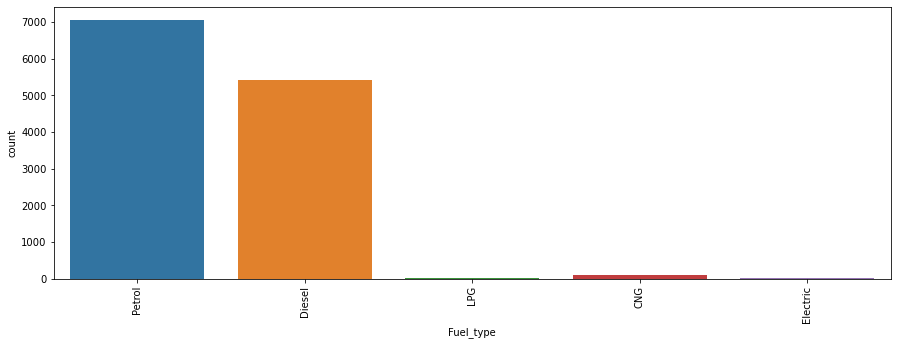

In [51]:
#Count plot for Fuel_type column
plt.figure(figsize=[15,5])
sns.countplot(df['Fuel_type'])
plt.xticks(rotation=90);

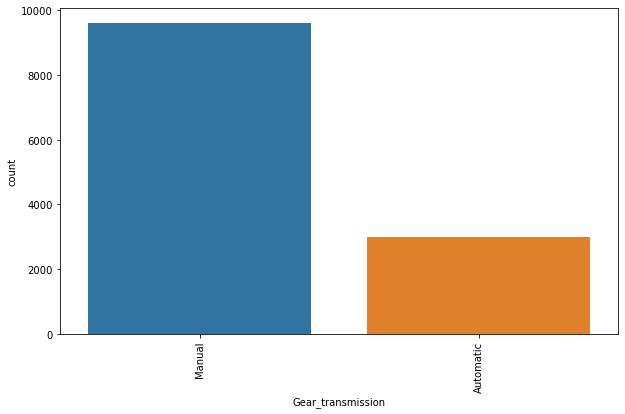

In [52]:
#Count plot for Gear_transmission column
plt.figure(figsize=[10,6])
sns.countplot(df['Gear_transmission'])
plt.xticks(rotation=90);

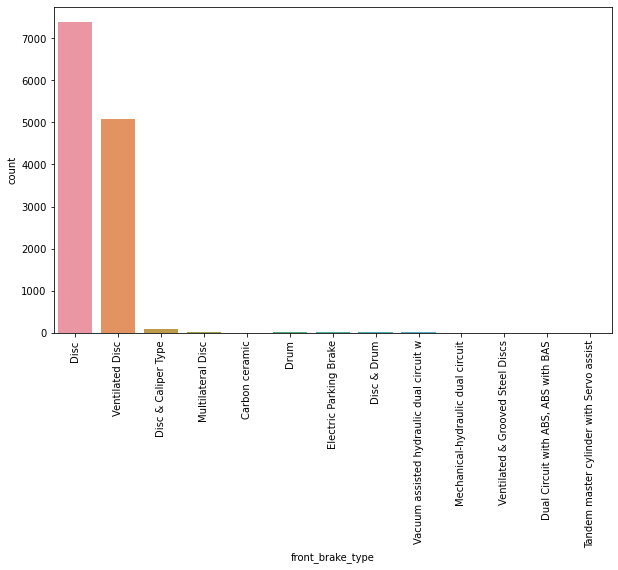

In [53]:
#Count plot for front_brake_type column
plt.figure(figsize=[10,6])
sns.countplot(df['front_brake_type'])
plt.xticks(rotation=90);

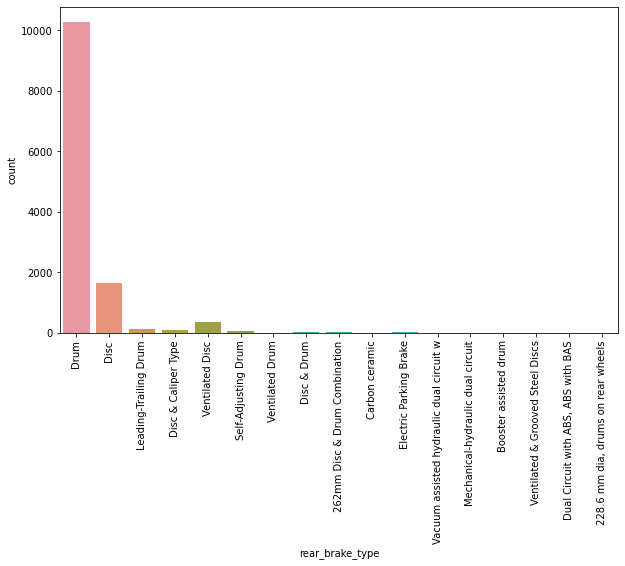

In [54]:
#Count plot for rear_brake_type column
plt.figure(figsize=[10,6])
sns.countplot(df['rear_brake_type'])
plt.xticks(rotation=90);

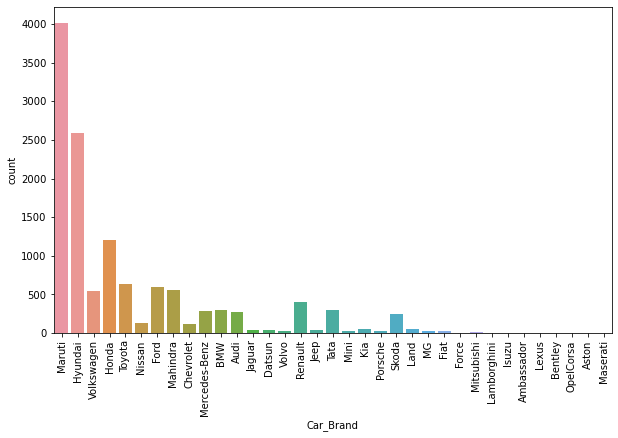

In [55]:
#Count plot for Car_Brand column
plt.figure(figsize=[10,6])
sns.countplot(df['Car_Brand'])
plt.xticks(rotation=90);

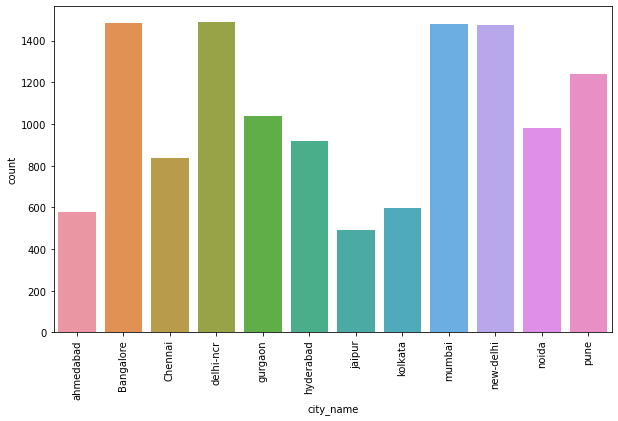

In [56]:
#Count plot for city_name column
plt.figure(figsize=[10,6])
sns.countplot(df['city_name'])
plt.xticks(rotation=90);

### Bivariate Analysis

In [57]:
col=['Running_in_kms', 'Engine_disp', 'Milage_in_km/ltr', 'Max_power', 'height', 'width', 'length', 'Weight', 'top_speed']

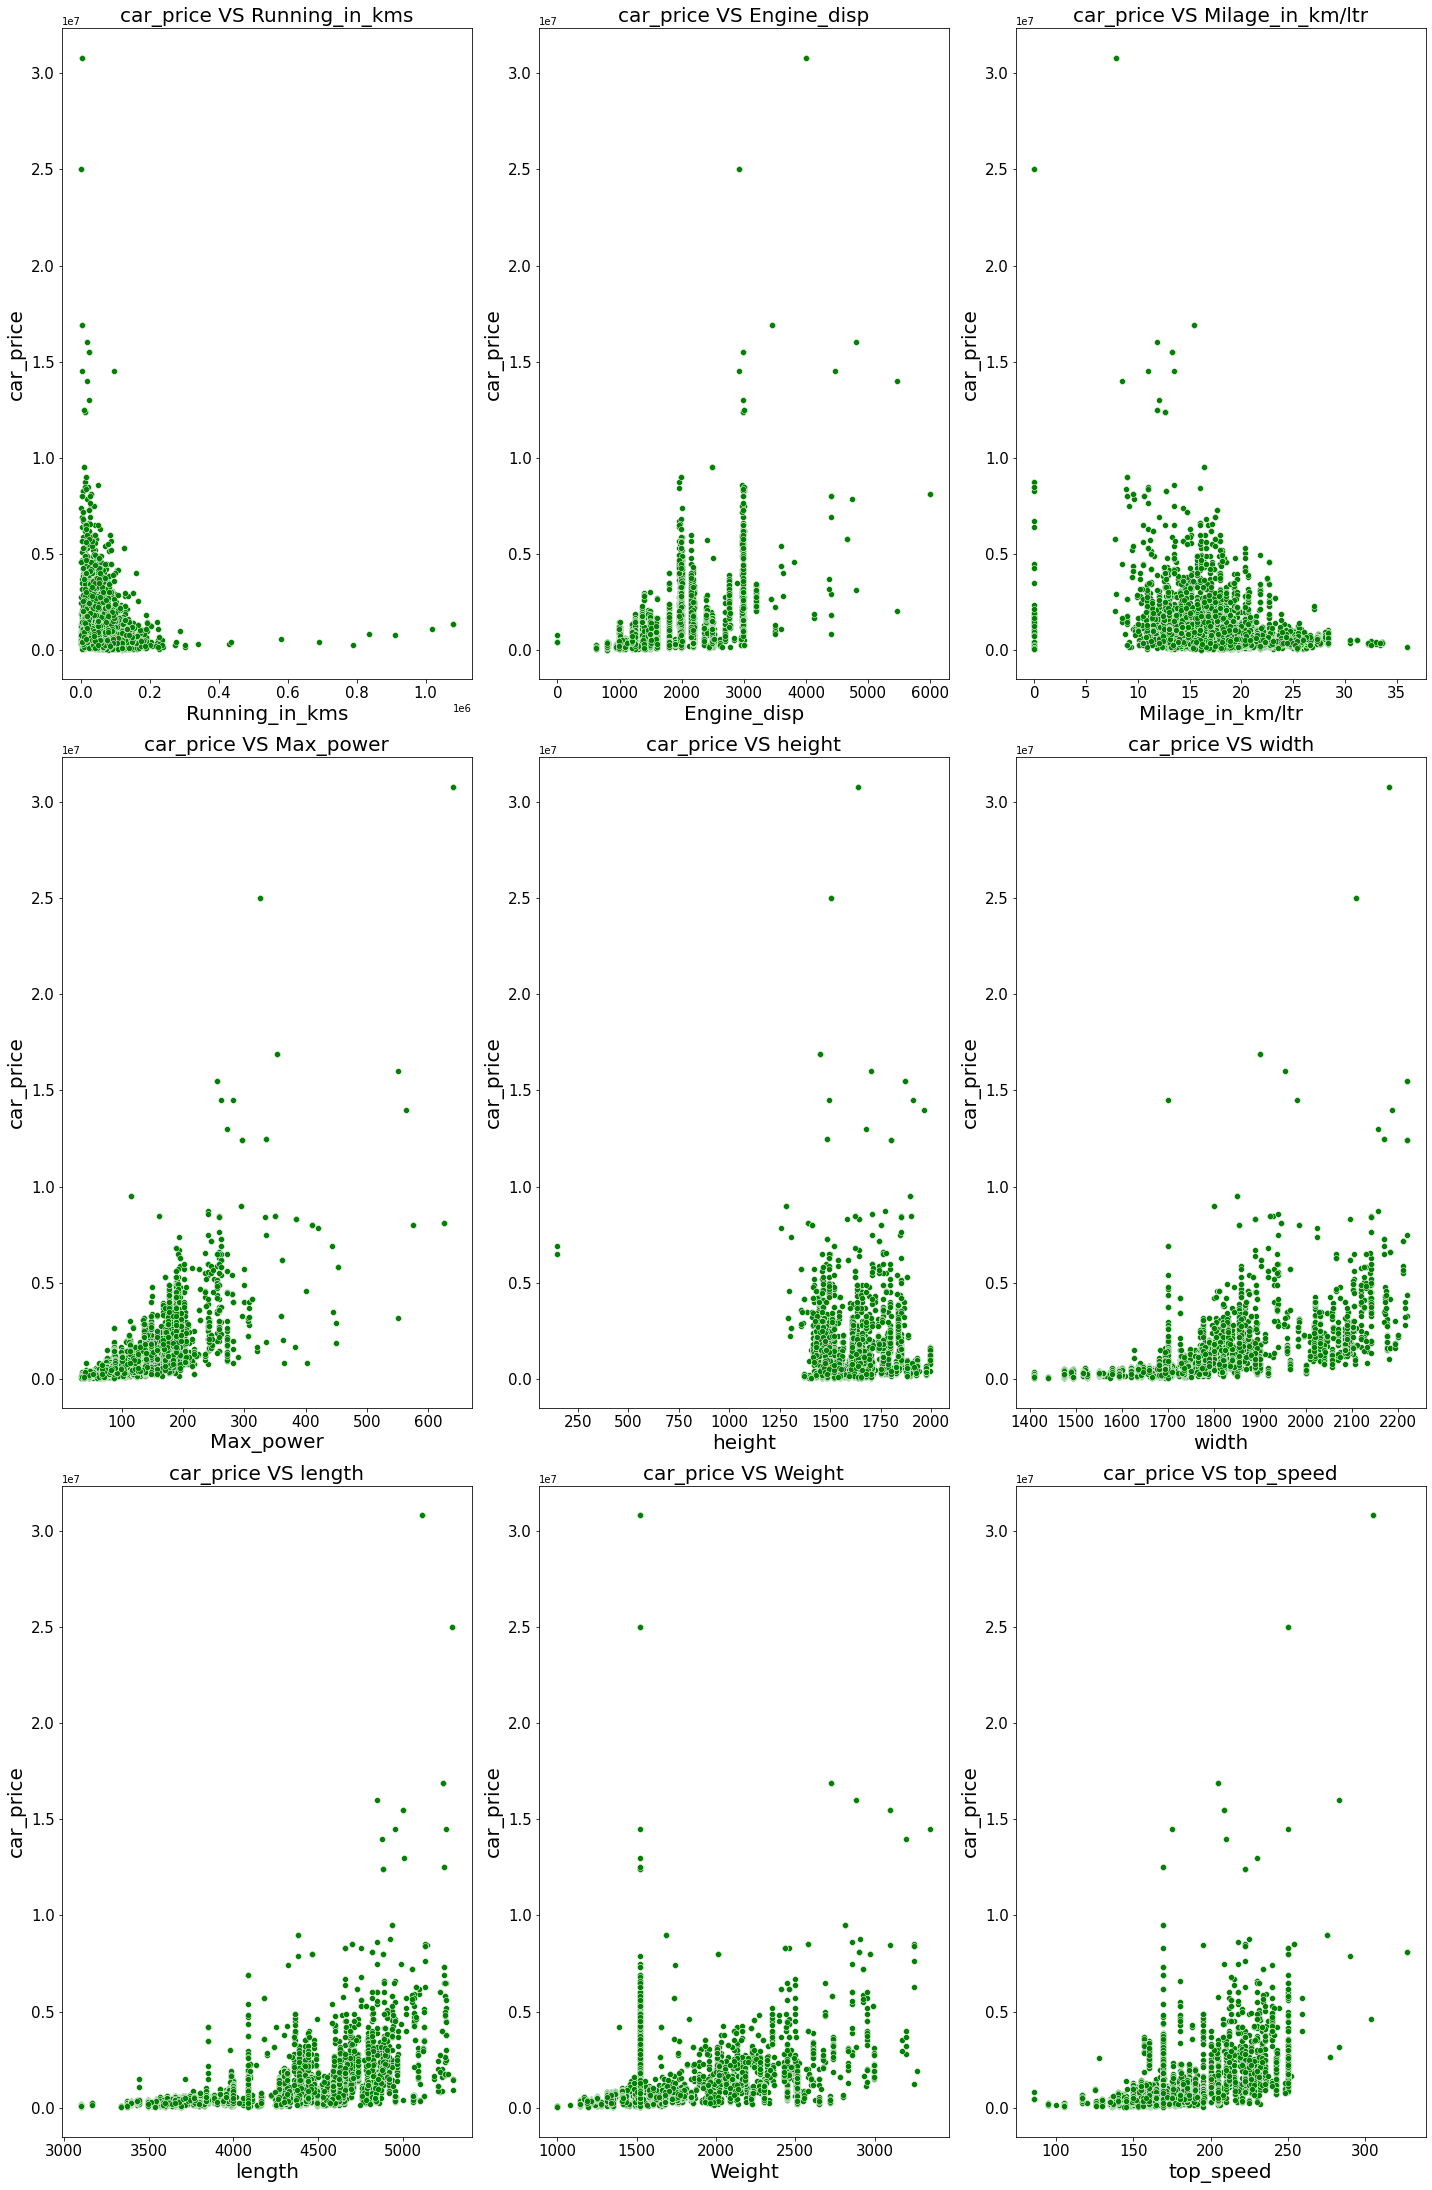

In [58]:
#regplot for numerical columns
plt.figure(figsize=(20,40))
for i in range(len(col)):
    plt.subplot(4,3,i+1)
    sns.scatterplot(x=df[col[i]] , y=df['car_price'],color="g")
    plt.title(f"car_price VS {col[i]}",fontsize=20)
    plt.xticks(fontsize=15)  
    plt.yticks(fontsize=15)
    plt.xlabel(col[i],fontsize = 20)
    plt.ylabel('car_price',fontsize = 20)
    plt.tight_layout()

**Observation:**

- Maximum cars are having below 20k driven kms. And car price is high for less driven cars.
- Maximum cars are having 1000-3000 Endine_disp. And car price is high for 3000 Endine_disp.
- Maximum cars are having milage of 10-25kms. And ,milage has no proper relation with car price.
- As Max_power is increasing car price is also increasing.
- Car_price has no proper relation with height.
- As the width is increasing car price is also increasing.
- As length is increasing car price is also increasing.
- Weight also has linear relationship with car price.
- As top_speed is increasing car price is also increasing.

In [59]:
col1=['Seating_cap','Car_age']

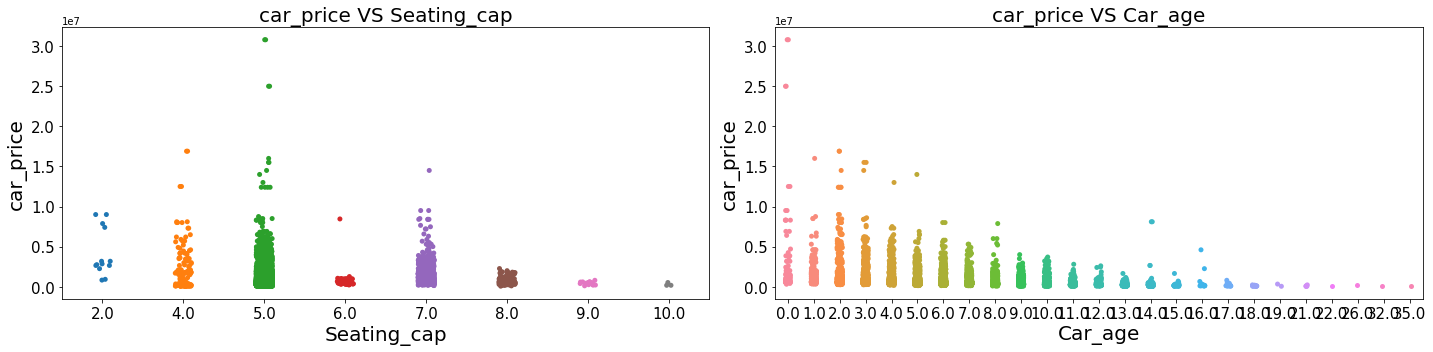

In [60]:
#stripplot for numerical columns
plt.figure(figsize=(20,5))
for i in range(len(col1)):
    plt.subplot(1,2,i+1)
    sns.stripplot(x=df[col1[i]] , y=df['car_price'])
    plt.title(f"car_price VS {col1[i]}",fontsize=20)
    plt.xticks(fontsize=15)  
    plt.yticks(fontsize=15)
    plt.xlabel(col1[i],fontsize = 20)
    plt.ylabel('car_price',fontsize = 20)
    plt.tight_layout()

- Cars with 5 and 4 seats are having highest price.
- As the age of the car increases the car price decreases.

In [61]:
col2=['Fuel_type', 'Gear_transmission', 'front_brake_type', 'rear_brake_type', 'Car_Brand', 'city_name']

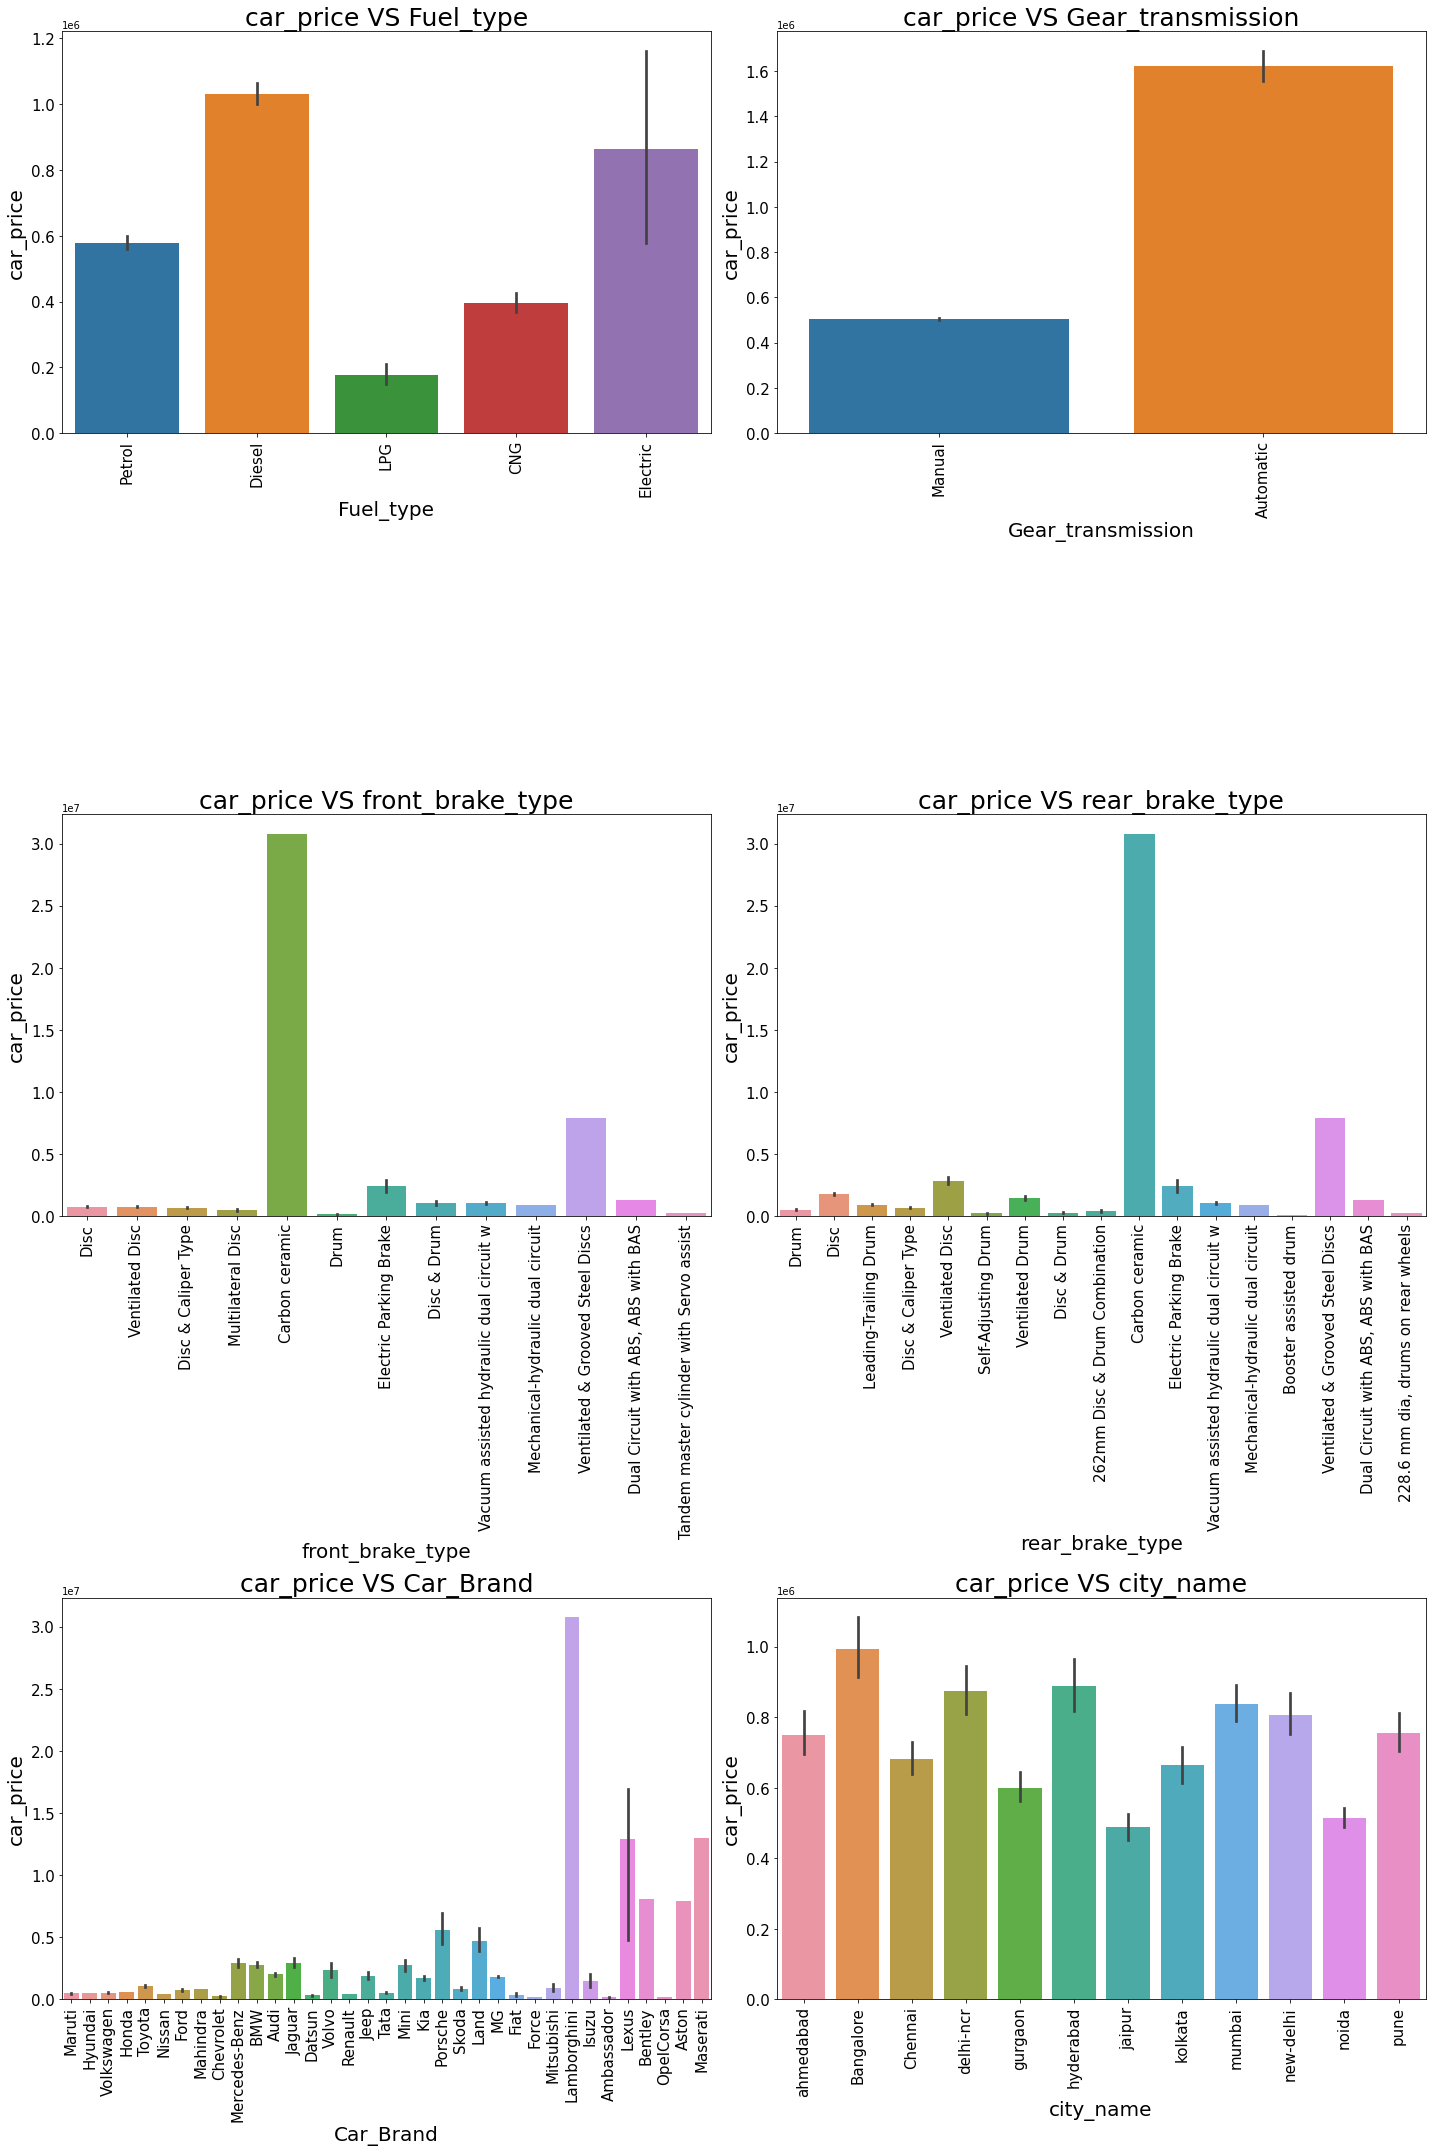

In [62]:
#Bar plot for all categorical columns
plt.figure(figsize=(20,30))
for i in range(len(col2)):
    plt.subplot(3,2,i+1)
    sns.barplot(y=df['car_price'],x=df[col2[i]])
    plt.title(f"car_price VS {col2[i]}",fontsize=25)
    plt.xticks(rotation=90,fontsize=15)  
    plt.yticks(rotation=0,fontsize=15)
    plt.xlabel(col2[i],fontsize = 20)
    plt.ylabel('car_price',fontsize = 20)
    plt.tight_layout()

**Observations:**

- For Diesel and Electric cars the price is high compared to Petrol,LPG and CNG.
- Cars with automatic gear are costlier than manual gear cars.
- Cars with Carbon Ceramic front break are costlier compared to other cars.
- Cars with carbon Ceramic rear braek are costlier compared to other cars.
- Lamborghini brand cars are having highset sale price.
- In Bangalore, Hyderabad and delhi-ncr the car prices are high as they are highly populated cities.

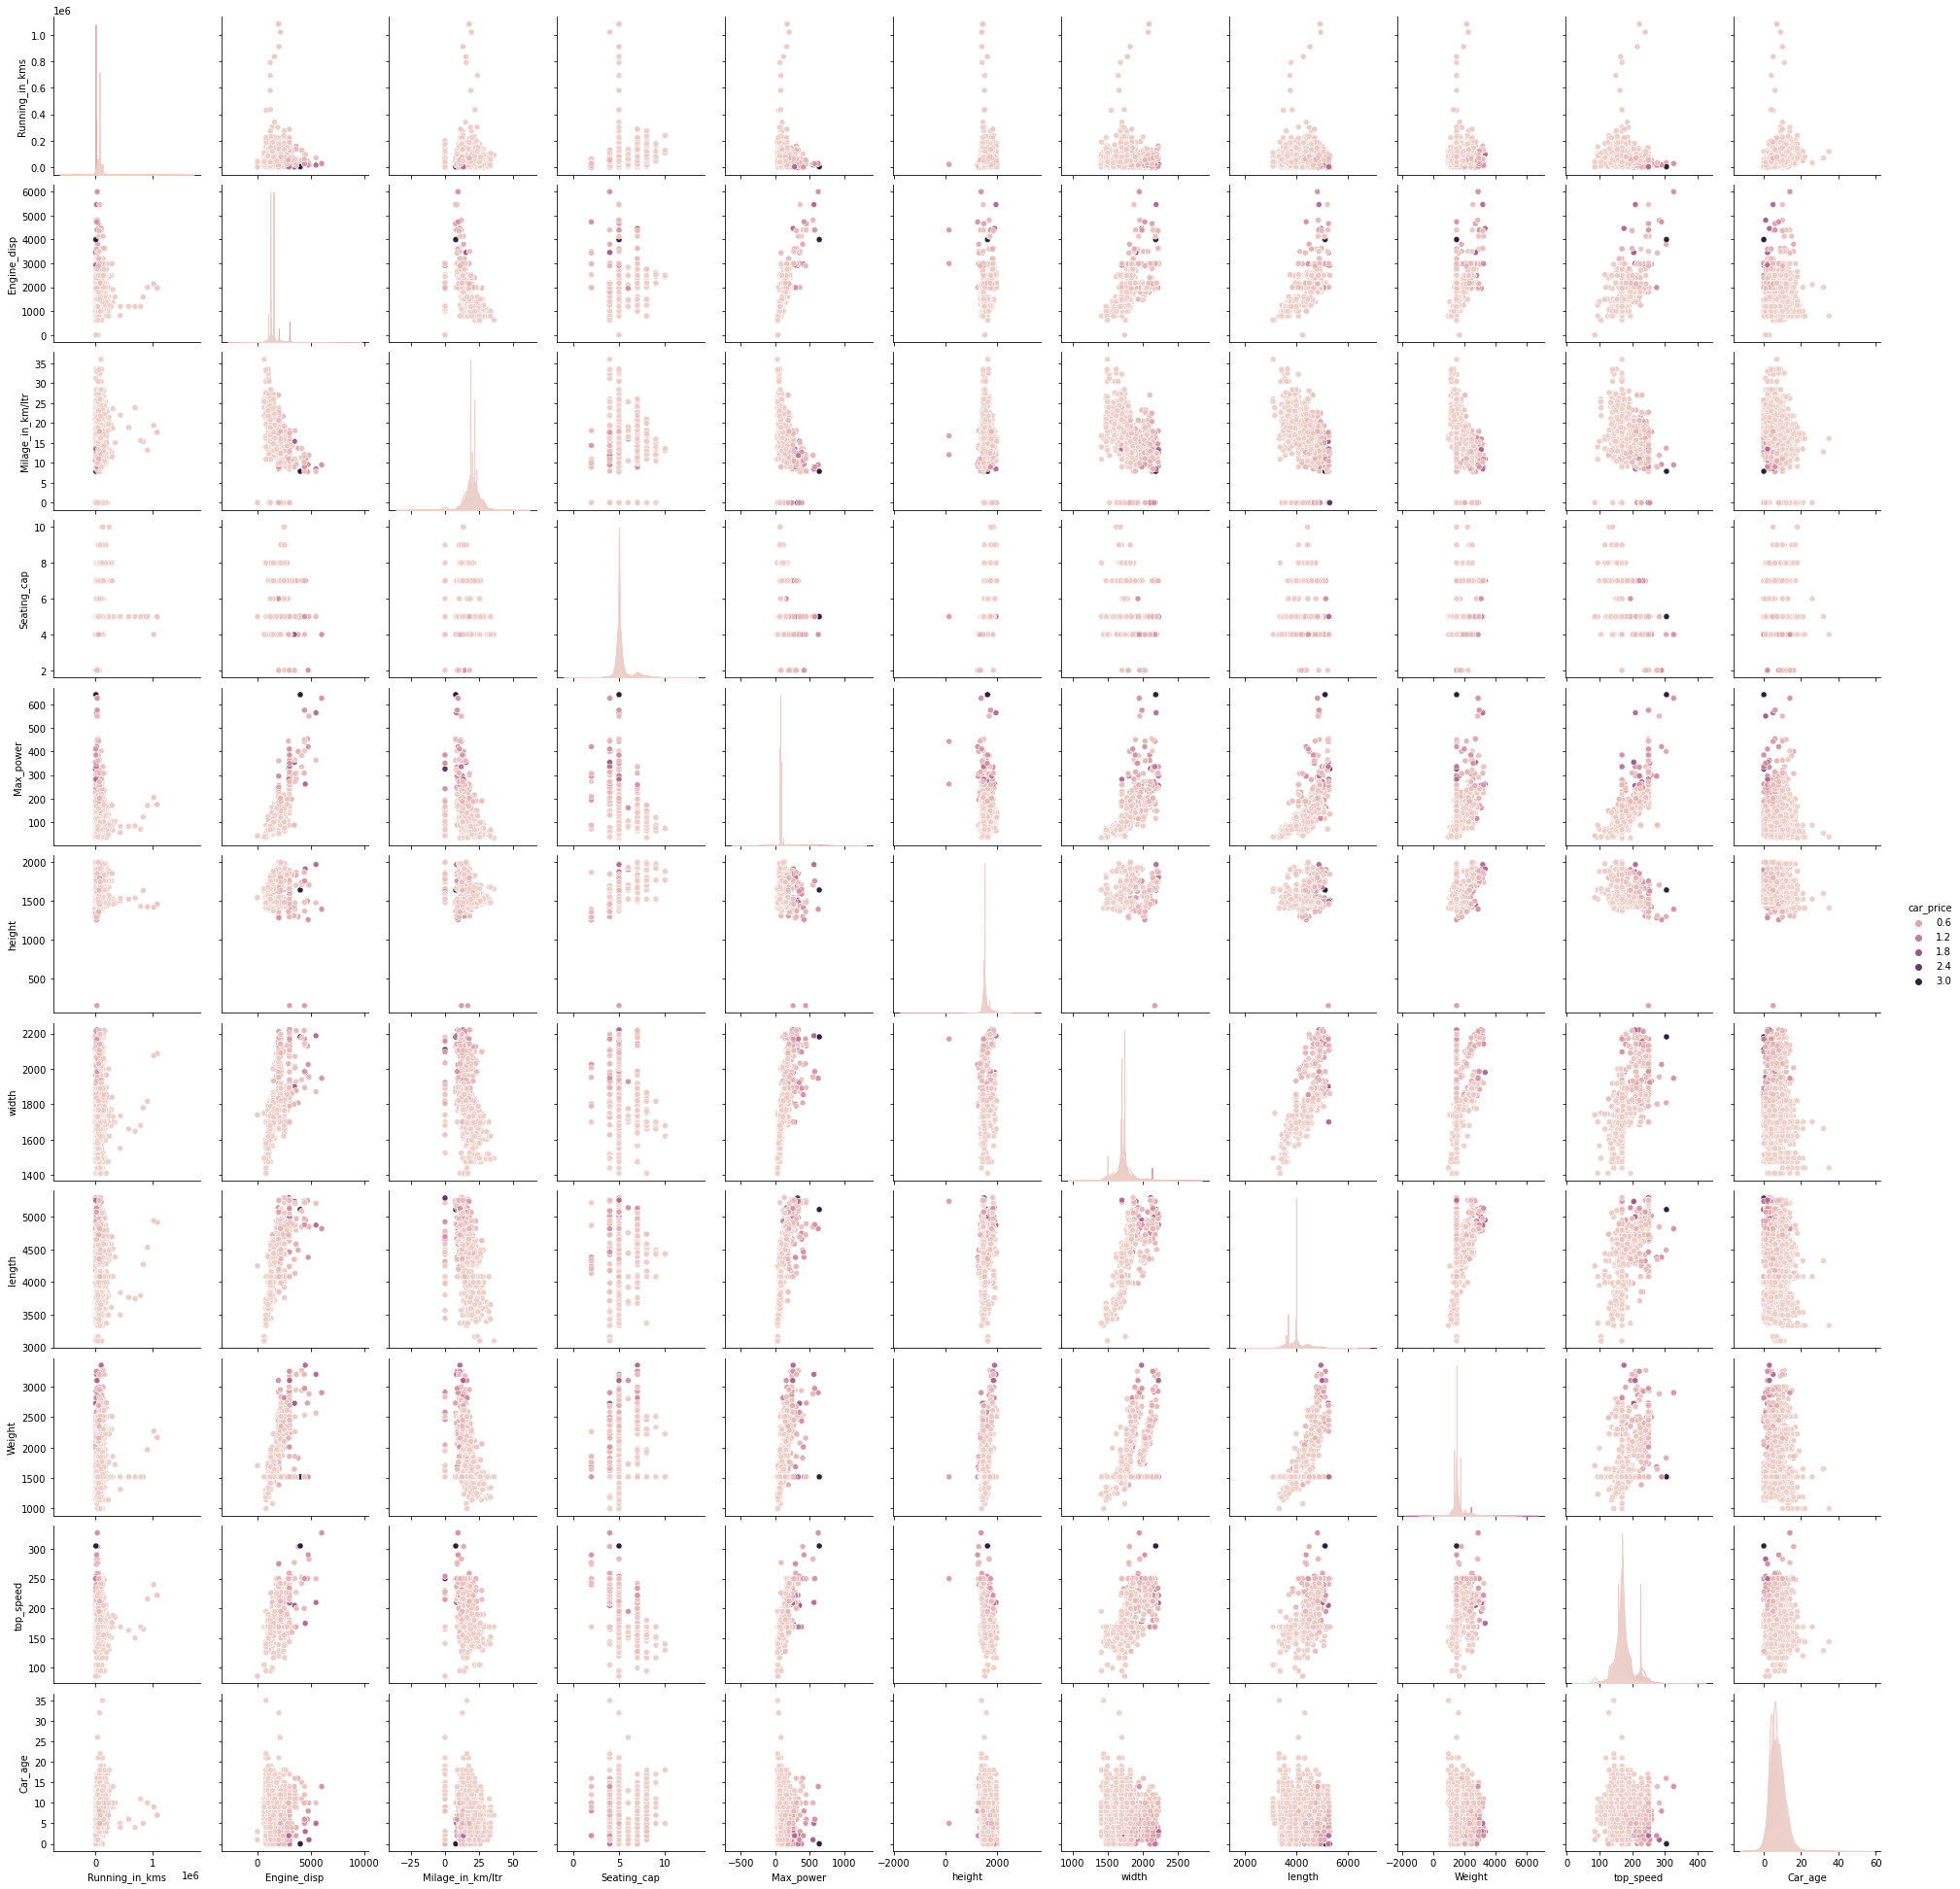

In [63]:
#pair ploting for df
sns.pairplot(df,hue="car_price")

# Checking for outliers:

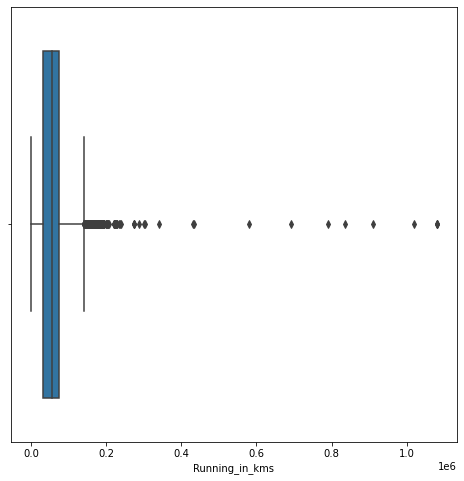

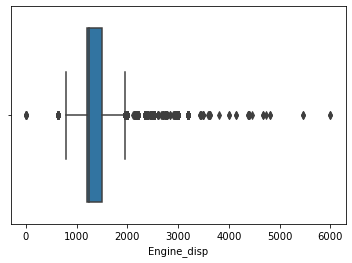

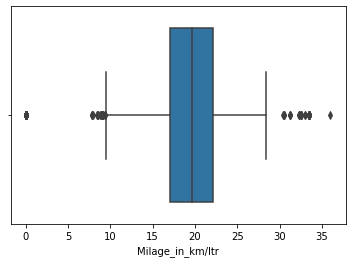

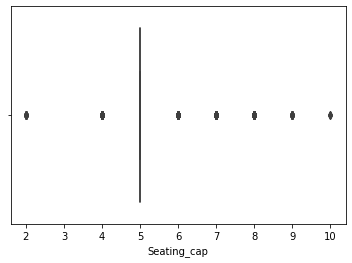

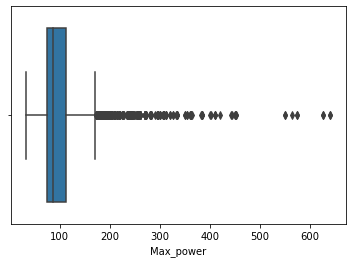

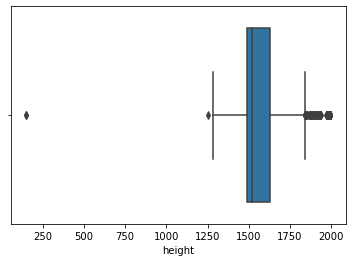

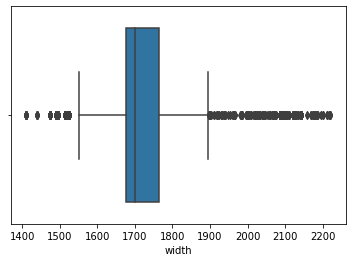

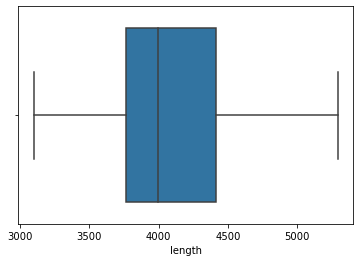

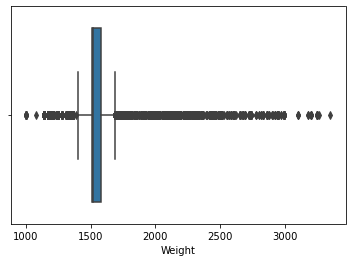

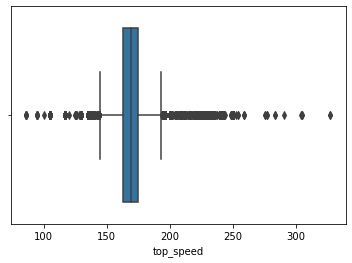

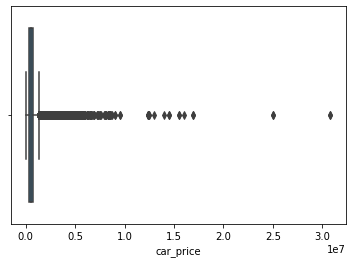

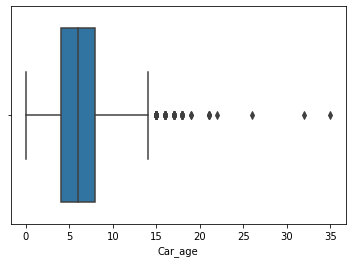

In [64]:
# Identifying the outliers using boxplot

plt.figure(figsize=(8,8))
for i in numerical_columns:
    sns.boxplot(df[i])
    plt.show()

There are outliers in all columns except length. Since car_price is our target we should not remove outliers from it.

# Removing Outliers

In [65]:
#Features having outliers 
features=df[['Running_in_kms', 'Engine_disp', 'Milage_in_km/ltr', 'Seating_cap', 'Max_power', 'height', 'width', 'Weight', 'top_speed', 'Car_age']]

In [66]:
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new.head()

,Fuel_type,Running_in_kms,Engine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,height,width,length,Weight,top_speed,Car_Brand,Car_Model,car_price,city_name,Car_age
0,Petrol,131125.0,998.0,Manual,21.79,5.0,Grey,67.05,Disc,Drum,1675.0,1620.0,3655.0,1340.0,169.0,Maruti,Wagon R,294000.0,ahmedabad,7.0
1,Petrol,73875.0,1197.0,Manual,18.90,5.0,White,82.00,Disc,Drum,1520.0,1660.0,3765.0,1520.0,165.0,Hyundai,Grand i10,480000.0,ahmedabad,6.0
2,Diesel,97922.0,1498.0,Manual,22.27,5.0,White,108.60,Ventilated Disc,Drum,1467.0,1699.0,4390.0,1750.0,180.0,Volkswagen,Vento,711000.0,ahmedabad,3.0
3,Petrol,24230.0,998.0,Manual,21.70,5.0,Red,67.05,Ventilated Disc,Drum,1564.0,1520.0,3565.0,1170.0,169.0,Maruti,S-Presso,422000.0,ahmedabad,2.0
4,Petrol,41174.0,998.0,Automatic,20.51,5.0,Grey,67.00,Ventilated Disc,Drum,1700.0,1495.0,3599.0,1350.0,152.0,Maruti,Wagon R,430000.0,ahmedabad,4.0


In [67]:
#Checking shape of new dataset
df_new.shape

(11481, 20)

In [68]:
#Checking shape of old dataset
df.shape

(12607, 20)

In [69]:
#Checking dataloss in zscore method
Dataloss = (((12608-11481)/12608)*100)
Dataloss

8.938769035532996

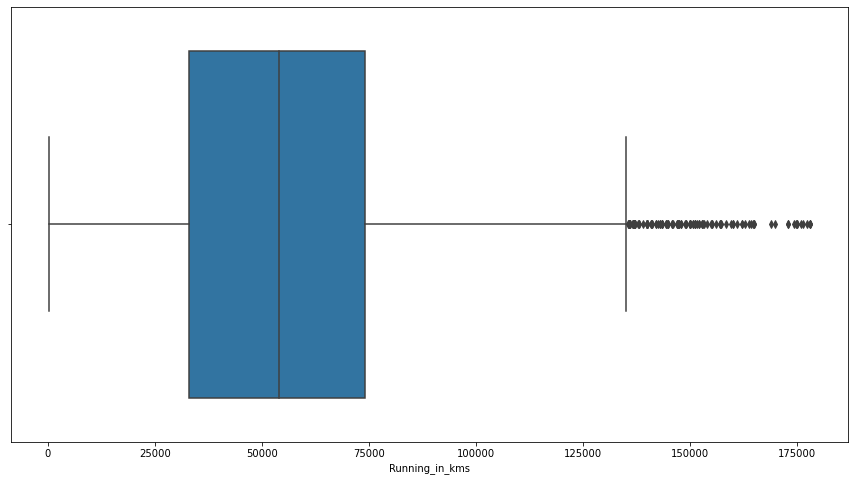

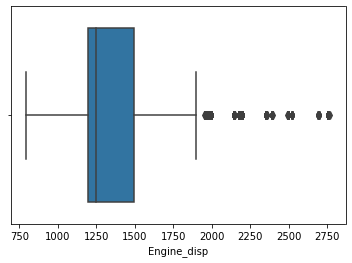

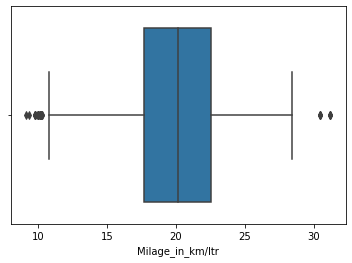

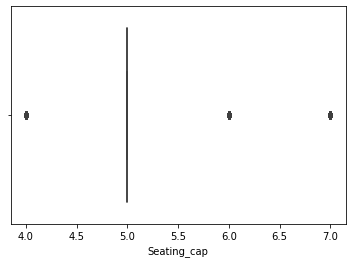

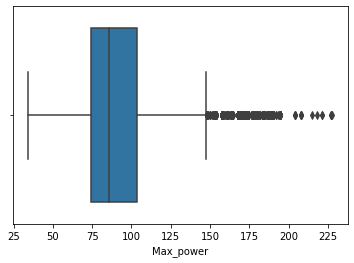

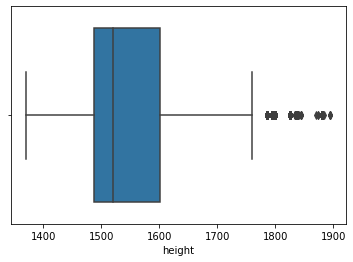

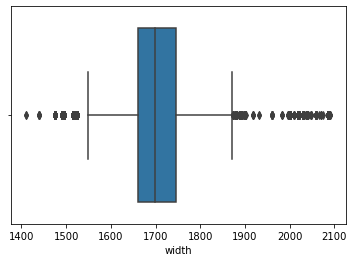

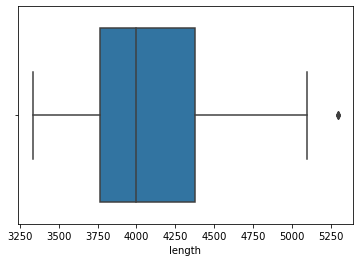

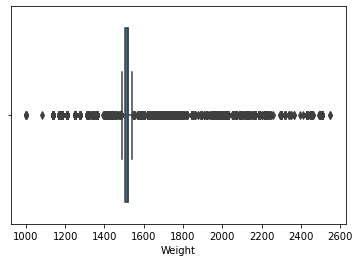

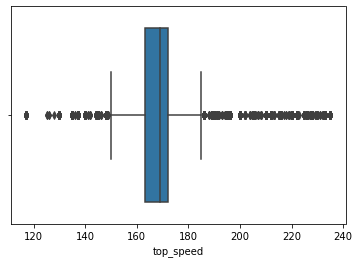

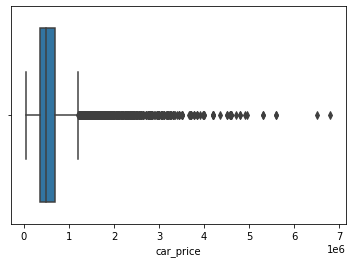

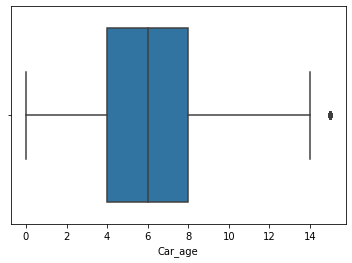

In [70]:
plt.figure(figsize=(15,8))
for i in numerical_columns:
    sns.boxplot(df_new[i])
    plt.show()

Outliers has been reduced in all the columns.

# Checking skewness

In [71]:
# Now checking for numerical columns
num_columns=[]
for i in df_new.dtypes.index:
    if df_new.dtypes[i]!='object':
        num_columns.append(i)
print(num_columns)

['Running_in_kms', 'Engine_disp', 'Milage_in_km/ltr', 'Seating_cap', 'Max_power', 'height', 'width', 'length', 'Weight', 'top_speed', 'car_price', 'Car_age']


In [72]:
#Checking for skewness in the dataset
df_new[num_columns].skew()

Running_in_kms      0.553747
Engine_disp         1.323144
Milage_in_km/ltr    0.094848
Seating_cap         3.187292
Max_power           1.392424
height              1.275943
width               0.358475
length              0.415213
Weight              1.908091
top_speed           0.966678
car_price           3.537058
Car_age             0.489995
dtype: float64

# Removing skewness using yeo-johnson method:

In [73]:
#Creating a list of skewed features
fea=['Running_in_kms', 'Engine_disp', 'Seating_cap', 'Max_power', 'height', 'Weight', 'top_speed']

Taking a list as fea with all the columns with skewness.

In [74]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [75]:
df_new[fea] = scaler.fit_transform(df_new[fea].values)

In [76]:
#Checking skewness again
df_new[fea].skew()

Running_in_kms   -0.066951
Engine_disp      -0.019124
Seating_cap      -2.369892
Max_power        -0.017556
height            0.000000
Weight           -0.120538
top_speed        -0.049855
dtype: float64

In [77]:
#Droping height column
df_new = df_new.drop(["height"],axis=1)

# Label Encoding:

In [78]:
# Separating categorical columns in df_new
cat_col=[]
for i in df_new.dtypes.index:
    if df_new.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Fuel_type', 'Gear_transmission', 'color', 'front_brake_type', 'rear_brake_type', 'Car_Brand', 'Car_Model', 'city_name']


Above are the list of categorical columns in df_new.

In [79]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_new[cat_col]= df_new[cat_col].apply(LE.fit_transform)

In [80]:
df_new[cat_col].head()

,Fuel_type,Gear_transmission,color,front_brake_type,rear_brake_type,Car_Brand,Car_Model,city_name
0,4,1,64,0,5,17,176,2
1,4,1,163,0,5,8,85,2
2,1,1,163,5,5,26,169,2
3,4,1,125,5,5,17,136,2
4,4,0,64,5,5,17,176,2


# Correlation

In [81]:
corr=df_new.corr()
corr

,Fuel_type,Running_in_kms,Engine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,width,length,Weight,top_speed,Car_Brand,Car_Model,car_price,city_name,Car_age
Fuel_type,1.000000,-0.366456,-0.466931,0.010464,-0.322595,-0.189900,-0.022924,-0.277132,-0.072346,0.175211,-0.445961,-0.377342,-0.435803,-0.209243,-0.011471,-0.057383,-0.264371,0.001075,0.002961
Running_in_kms,-0.366456,1.000000,0.235234,0.112165,0.009768,0.084825,0.047637,0.088250,0.126146,-0.029926,0.098911,0.168742,0.202939,0.087301,0.000461,0.041264,-0.209364,0.009958,0.533645
Engine_disp,-0.466931,0.235234,1.000000,-0.307012,-0.459934,0.258043,-0.021936,0.888419,0.035726,-0.400740,0.762580,0.834068,0.709730,0.622660,-0.099083,0.024168,0.539021,-0.020435,0.065863
Gear_transmission,0.010464,0.112165,-0.307012,1.000000,0.289495,0.016509,0.026381,-0.419817,0.036028,0.249026,-0.316690,-0.330819,-0.213069,-0.353655,0.067991,0.090295,-0.496451,0.028802,0.117629
Milage_in_km/ltr,-0.322595,0.009768,-0.459934,0.289495,1.000000,-0.188520,-0.004285,-0.497127,0.038444,0.239103,-0.283154,-0.399172,-0.385836,-0.255270,0.102649,-0.014236,-0.255417,0.036665,-0.233646
Seating_cap,-0.189900,0.084825,0.258043,0.016509,-0.188520,1.000000,0.013384,0.170303,-0.010171,-0.073183,0.200896,0.254421,0.341320,-0.076168,0.092918,0.059382,0.103517,-0.021090,-0.059635
color,-0.022924,0.047637,-0.021936,0.026381,-0.004285,0.013384,1.000000,-0.033060,-0.006231,0.004043,-0.019912,-0.033134,-0.017535,-0.050544,-0.008890,0.038208,-0.033909,0.019021,0.000469
Max_power,-0.277132,0.088250,0.888419,-0.419817,-0.497127,0.170303,-0.033060,1.000000,-0.034228,-0.433055,0.781865,0.835939,0.662255,0.713394,-0.198882,0.020787,0.631624,-0.015664,-0.047097
front_brake_type,-0.072346,0.126146,0.035726,0.036028,0.038444,-0.010171,-0.006231,-0.034228,1.000000,0.118525,-0.060745,-0.026167,-0.022854,0.006635,0.033393,-0.044090,-0.083888,0.014070,0.198085
rear_brake_type,0.175211,-0.029926,-0.400740,0.249026,0.239103,-0.073183,0.004043,-0.433055,0.118525,1.000000,-0.333729,-0.395651,-0.279426,-0.307627,-0.002777,-0.052151,-0.360607,0.026345,-0.016757


Above are the correlations of all the pair of features.To get better visualization on the correlation of features,let me plot it using heat map.

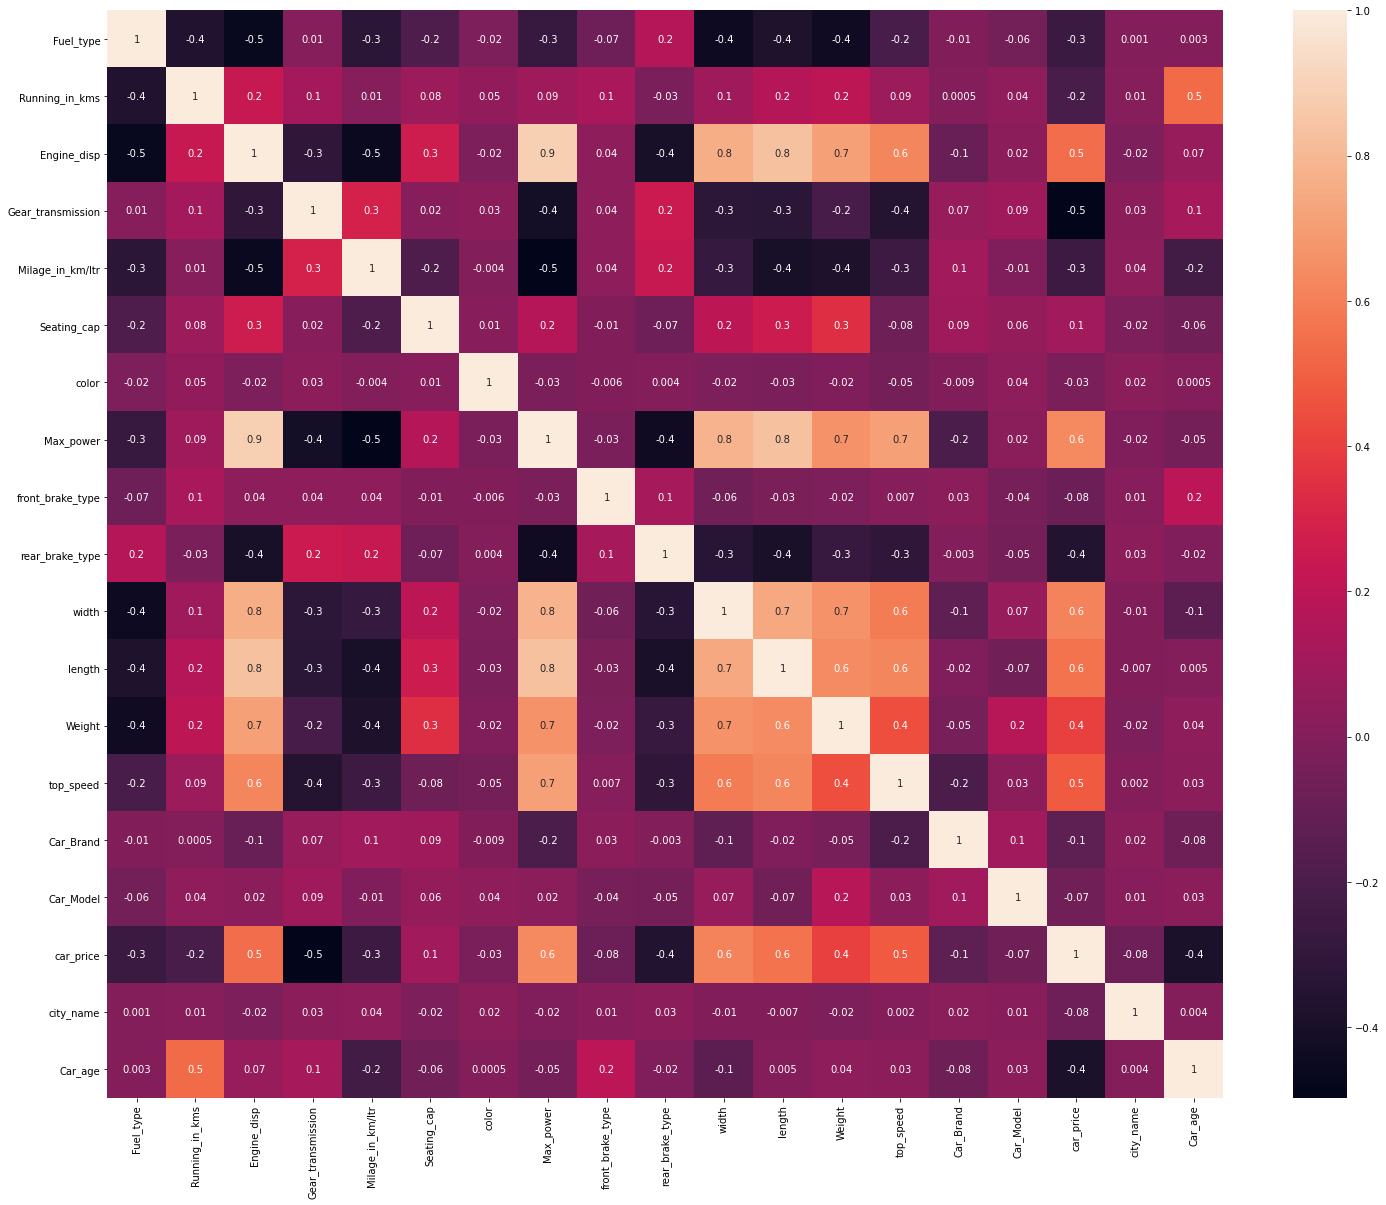

In [82]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(25,20))
sns.heatmap(df_new.corr(), fmt='.1g', annot = True,cmap="rocket")
plt.yticks(rotation=0);

I can notice there is multicolinearity issue in the dataset. So we have to use VIF to remove multicolinearity.

# Separating Features and Target:

In [83]:
x = df_new.drop("car_price",axis=1)
y = df_new["car_price"]

# Standard Scaler

In [84]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [85]:
X.head()

,Fuel_type,Running_in_kms,Engine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,width,length,Weight,top_speed,Car_Brand,Car_Model,city_name,Car_age
0,0.821974,2.130695,-1.195810,0.511787,0.470290,-0.19967,-0.939515,-1.002315,-0.810819,0.287785,-0.790362,-1.073737,-1.079309,0.030349,0.475229,1.119280,-0.997096,0.336469
1,0.821974,0.676649,-0.323042,0.511787,-0.340682,-0.19967,1.064776,-0.221629,-0.810819,0.287785,-0.415408,-0.765970,0.027186,-0.215359,-0.853907,-0.371963,-0.997096,0.000351
2,-1.208525,1.327903,0.627849,0.511787,0.604985,-0.19967,1.064776,0.729578,1.241794,0.287785,-0.049827,0.982707,0.991807,0.653755,1.804364,1.004569,-0.997096,-1.008003
3,0.821974,-1.041906,-1.195810,0.511787,0.445035,-0.19967,0.295453,-1.002315,1.241794,0.287785,-1.727747,-1.325546,-2.600515,0.030349,0.475229,0.463788,-0.997096,-1.344121
4,0.821974,-0.366963,-1.195810,-1.953939,0.111106,-0.19967,-0.939515,-1.005376,1.241794,0.287785,-1.962093,-1.230418,-1.006562,-1.096125,0.475229,1.119280,-0.997096,-0.671885


# Checking multicolinearity 

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,3.379790,Fuel_type
1,1.777252,Running_in_kms
2,8.980762,Engine_disp
3,1.348078,Gear_transmission
4,3.210551,Milage_in_km/ltr
5,1.334998,Seating_cap
6,1.013441,color
7,10.009659,Max_power
8,1.095950,front_brake_type
9,1.310114,rear_brake_type


In [87]:
#Droping high VIF columns
X = X.drop(["Max_power"],axis=1)

In [88]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,3.150828,Fuel_type
1,1.777250,Running_in_kms
2,6.094087,Engine_disp
3,1.308243,Gear_transmission
4,3.207531,Milage_in_km/ltr
5,1.329129,Seating_cap
6,1.013429,color
7,1.095948,front_brake_type
8,1.281711,rear_brake_type
9,3.321526,width


# Finding Best Random State and Accuracy:

In [89]:
#importing necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [90]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestRegressor()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.965773774076267  on Random_state  10


In [91]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

# Regression Algorithms

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# Linear Regression

In [93]:
LR=LinearRegression()
LR.fit(X_train,y_train)
pred=LR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(LR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

R2_score: 66.42621487950294
mean_squared_error: 82325556987.89201
mean_absolute_error: 180679.5526370086
root_mean_squared_error: 286924.30532788957

Cross validation score : 59.86569683426731


# Random Forest Regressor

In [94]:
RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)
pred=RFR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(RFR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

R2_score: 96.5395441154097
mean_squared_error: 8485309508.846551
mean_absolute_error: 50163.60340051144
root_mean_squared_error: 92115.73974542326

Cross validation score : 92.88326415475542


# Decision Tree Regressor

In [95]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)
pred=DTR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(DTR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

R2_score: 92.46368704146563
mean_squared_error: 18479631049.036285
mean_absolute_error: 61530.70711175617
root_mean_squared_error: 135939.80671251626

Cross validation score : 88.04736291590203


# XGB Regressor

In [96]:
XGB=XGBRegressor()
XGB.fit(X_train,y_train)
pred=XGB.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(XGB, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

R2_score: 96.2840934479852
mean_squared_error: 9111694600.761976
mean_absolute_error: 52145.37471085813
root_mean_squared_error: 95455.1968242797

Cross validation score : 93.24681591139617


# Gradient Boosting Regressor

In [97]:
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
pred=GBR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(GBR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

R2_score: 94.02082535802748
mean_squared_error: 14661405646.14955
mean_absolute_error: 73869.01601519021
root_mean_squared_error: 121084.29149212358

Cross validation score : 90.20572412080469


## Best model - Random Forest Regressor

# Hyper parameter tunning for best model:

In [98]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [99]:
#Parameters for Random Forest
parameters = {'n_estimators':[100,200],
             'criterion':['squared_error', 'absolute_error', 'poisson'],
             'max_depth':np.arange(2,50),
             'max_features':["auto","sqrt","log2"],
             'max_leaf_nodes':[10,20,30,40]}

In [192]:
Best_model=RandomForestRegressor(n_estimators=100,criterion='squared_error',max_depth=20,max_features='auto',max_leaf_nodes=500,
                                 min_samples_leaf=2,random_state=198)
Best_model.fit(X_train,y_train)
pred=Best_model.predict(X_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_Score: 95.8170132328105
mean_squared_error: 10257011958.76241
mean_absolute_error: 60244.43984973485
RMSE value: 101276.9073321377


### Saving the model

In [193]:
import pickle
filename = "car_price.pkl"
pickle.dump(RFR,open(filename,'wb'))

# Predictions

In [204]:
prediction = RFR.predict(X_test)
prediction

array([1138730.        , 1576150.        ,  650611.66666667, ...,
        620170.        ,  250840.        ,  315240.        ])

In [205]:
pd.DataFrame([RFR.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"])

0          1              2         3          4     \
Predicted  1138730.0  1576150.0  650611.666667  605020.0  1696180.0   
Actual     1651000.0  1575000.0  651000.000000  715000.0  1675000.0   

                5             6         7         8         9         10    \
Predicted  1175920.0  1.741072e+06  560830.0  686340.0  764420.0  578550.0   
Actual     1099000.0  1.500000e+06  625000.0  660000.0  735000.0  485000.0   

               11         12        13        14        15        16    \
Predicted  563790.0  1861820.0  174990.0  634830.0  739850.0  264750.0   
Actual     541000.0  1725000.0  145000.0  650000.0  686000.0  261000.0   

                    17        18        19        20        21        22    \
Predicted  162007.619048  332220.0  348498.0  333110.0  576120.0  691710.0   
Actual     165000.000000  350000.0  350000.0  398000.0  540000.0  701000.0   

               23        24        25        26        27         28    \
Predicted  765230.0  364270.0  305872.5  327110.0  622690.0  1609900.0   
Actual     840000.0  342000.0  275000.0  319000.0  650000.0  1650000.0   

               29        30         31        32        33        34    \
Predicted  586560.0  578600.0  3546410.0  736410.0  801280.0  518246.0   
Actual     632000.0  400000.0  3450000.0  861000.0  775000.0  425000.0   

               35        36         37        38        39        40    \
Predicted  723800.0  762900.0  3588460.0  528210.0  963500.0  745250.0   
Actual     597000.0  775000.0  3850000.0  475000.0  800000.0  739000.0   

               41        42        43        44        45         46    \
Predicted  674670.0  551930.0  706800.0  797600.0  646110.0   853790.0   
Actual     675000.0  556000.0  674000.0  849000.0  622000.0  1075000.0   

                47        48        49        50        51        52    \
Predicted  1838140.0  247300.0  306610.0  371680.0  484900.0  414310.0   
Actual     1800000.0  251000.0  290000.0  257000.0  516000.0  370000.0   

               53        54         55        56        57        58    \
Predicted  428090.0  455890.0  2963940.0  310620.0  313390.0  510110.0   
Actual     450000.0  445000.0  2800000.0  299000.0  349000.0  450000.0   

               59        60        61        62        63             64    \
Predicted  357890.0  424380.0  339000.0  516400.0  245130.0  673306.666667   
Actual     362000.0  435000.0  340000.0  485000.0  265000.0  675000.000000   

               65        66        67         68        69        70    \
Predicted  402300.0  289675.0  622540.0  1405750.0  263530.0  358050.0   
Actual     330000.0  252000.0  680000.0  1450000.0  252000.0  390000.0   

               71         72         73         74        75        76    \
Predicted  637160.0  1027110.0  1628340.0  1260870.0  649530.0  635490.0   
Actual     628000.0  1280000.0  1390000.0  1190000.0  657000.0  651000.0   

               77        78         79        80        81         82    \
Predicted  535230.0  421790.0  1637400.0  428320.0  529660.0  1783650.0   
Actual     541000.0  453000.0  1600000.0  410000.0  549000.0  1450000.0   

               83        84         85        86        87        88    \
Predicted  366990.0  653790.0  1670380.0  292370.0  204910.0  303770.0   
Actual     363000.0  656000.0  1545000.0  301000.0  250000.0  280000.0   

               89        90         91        92        93        94    \
Predicted  905940.0  265880.0   987030.0  639630.0  276460.0  398430.0   
Actual     749000.0  258000.0  1090000.0  775000.0  295000.0  455000.0   

               95        96        97        98        99        100   \
Predicted  934670.0  405470.0  445520.0  213150.0  979220.0  216730.0   
Actual     850000.0  390000.0  475000.0  199000.0  975000.0  215000.0   

               101       102       103       104       105       106   \
Predicted  436070.0  919100.0  905740.0  272340.0  332170.0  313300.0   
Actual     455000.0  795000.0  875000.0  25000

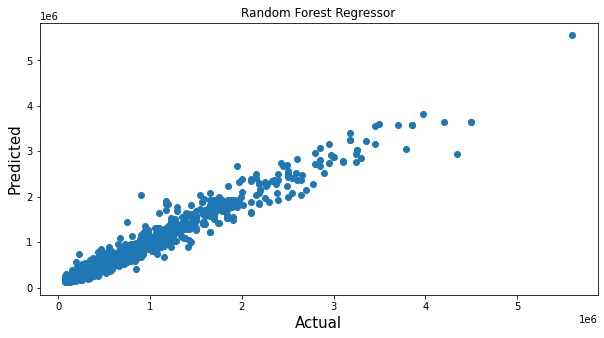

In [196]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction)
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("Random Forest Regressor")
plt.show()